#Zadanie 3
*Implementacja metody QR do obliczania wartości własnych
macierzy Hessenberga z przesunięciem*

Napisano funkcję w Pythonie *eigenvalues_qr_hessenberg_shift(H, shift, tol, max_iter)*, która oblicza wszystkie wartości własne dolnej macierzy Hessenberga z przesunięciem.

**input**: \
H: Dolna macierz Hessenberga (tablica NumPy 2D) \
shift: Przesunięcie (liczba zmiennoprzecinkowa) \
tol: Tolerancja zbieżności (liczba zmiennoprzecinkowa) \
max_iter: Maksymalna liczba iteracji (liczba całkowita)

**output**: \
eigenvalues: Wartości własne macierzy (tablica NumPy 1D)

Najpierw zaimportowano niezbędną do obliczeń bibliotekę - *numpy*.

In [9]:
import numpy as np

Następnie zdefiniowano funkcję *eigenvalues_qr_hessenberg_shift(H, shift, tol, max_iter)* służązą do obliczenia wszystkich wartości własnych macierzy Hessenberga z przesunięciem.

In [10]:
def eigenvalues_qr_hessenberg_shift(H, shift, tol, max_iter):
  H = H.copy()
  n = H.shape[0]

  for _ in range(max_iter):
        # Przesunięcie macierzy
        I = np.eye(n)
        H_shifted = H - shift * I

        # Dekompozycja QR
        Q, R = np.linalg.qr(H_shifted)

        # Aktualizacja macierzy H
        H = R @ Q + shift * I

        # Sprawdzamy zbieżność na podstawie elementów poddiagonalnych
        off_diagonal = np.abs(np.diag(H, k=-1))
        if np.all(off_diagonal < tol):
            break

  return np.diag(H)  # Wartości własne to elementy diagonalne macierzy H

* Linijka kodu *H = H.copy()* tworzy kopię, aby nie modyfikować oryginalnej macierzy niezbędnej do obliczeń.
* Dalej zrobiono przesunięcie macierzy
* Po tym zrobiono dekompozycję QR
* Zaktualizowano stan macierzy H
* Sprawdzono zbieżność na podstawie elementów poddiagonalnych

Funkcja zwraca *np.diag(H)*, co faktycznie jest wartościami własnymi macierzy. Ale wynik nadal nie jest wyświetlany na ekranie, dlatego trzeba użyć tej funkcji.

Najpierw stworzono *przykładową macierz Hessenberga*:

In [11]:
H = np.array([
    [4, 3, 0],
    [2, 5, 1],
    [0, 2, 6]
], dtype=float)

Następnie sdefiniowano *shift* (przesunięcie), *tol* (tolerancję zbieżności) oraz *max_iter* (maksymalną liczbę iteracji).

In [12]:
shift = 0.1
tol = 1e-6
max_iter = 1000

Następnie obliczono wartości własne macierzy Hessenberga przy użyciu funkcji *eigenvalues_qr_hessenberg_shift*:

In [13]:
eigenvalues = eigenvalues_qr_hessenberg_shift(H, shift, tol, max_iter)
print("Wartości własne macierzy H:")
print(eigenvalues)

Wartości własne macierzy H:
[7.74656844 5.4549039  1.79852766]


# Zadanie 4
*Metoda QR z przekształceniem Householdera -
implementacja podstawowa*

Napisano funkcję w Pythonie, która przyjmuje macierz kwadratową i zwraca wartości własne tej macierzy przy użyciu metody QR z przekształceniem Householdera.

Najpierw zaimplementowano funkcję *householder_transform(matrix)*, która przekształca macierz kwadratową matrix do postaci trójkątnej za pomocą przekształcenia Householdera.

In [14]:
import numpy as np

def householder_transform(matrix):
    A = matrix.copy()
    n = A.shape[0]

    for k in range(n - 1):
        # Wektor kolumnowy
        x = A[k:, k]
        e1 = np.zeros_like(x)
        e1[0] = np.linalg.norm(x) * np.sign(x[0])

        # Wektor Householdera
        v = x + e1
        v = v / np.linalg.norm(v)

        # Macierz Householdera
        Hk = np.eye(n)
        Hk[k:, k:] -= 2.0 * np.outer(v, v)

        # Przekształcenie macierzy
        A = Hk @ A @ Hk.T

    return A


1. Ta funkcja najpierw **kopiuje macierz wejściową**, żeby nie modyfikować danych w macierzy oryginalnej
2. Iteruje po *kolumnach* macierzy:
  * pobiera **wektor kolumnowy** (który zaczyna się od aktualnego wiersza)
  * tworzy **wektor jednostkowy**, którego norma odpowiada normie wektora kolumnowego
  * wyznacza **wektor Householdera**, który pozwala 'zerować' wartości poniżej diagonalnej
  * tworzy **macierz Householdera** i stoduje ją do macierzy, żeby stopniowo redukować ją do formy trójkątnej
3. Zwraca **macierz w postaci górnej trójkątnej**, co ułatwia obliczenie wartości własnych.

Przekształcenie Householdera **pozwala na stabilne przekształcenie macierzy** do postaci łatwiejszej do dalszej analizy.
Redukcja do postaci trójkątnej przyspiesza iteracyjny proces QR.


Następnie stworzono funkcję *qr_algorithm(matrix, iterations)*, która używa przekształcenia Householdera do redukcji macierzy do postaci trójkątnej, a następnie stosuje iteracyjny proces QR:

In [15]:
def qr_algorithm(matrix, iterations=1000, tol=1e-10):
    A = householder_transform(matrix)  # Redukcja do macierzy trójkątnej
    n = A.shape[0]

    for _ in range(iterations):
        Q, R = np.linalg.qr(A)  # Rozkład QR
        A = R @ Q  # Nowa macierz

        # Sprawdzamy zbieżność
        if np.all(np.abs(A[np.tril_indices(n, -1)]) < tol):
            break

    return np.diag(A)  # Wartości własne to elementy diagonalne macierzy A


Algorytm ten:
1. **Redukuje macierz** do postaci trójkątnej przy pomocy *householder_transform(matrix)*
2. Iteracyjnie wykonuje **dekompozycję QR**:
  * dekomponuje A na iloczyn ortogonalnej macierzy Q i macierzy trójkątnej R
  * mnoży R @ Q, aby utworzyć nową macierz A w kolejnej iteracji
3. Sprawdza **zbieżność**:
  * jeśli wartości poniżej głównej przekątnej macierzy są bliskie zera (mniejsze niż tolerancja *tol*), kończy iteracje.
  * jeśli osiągnięto maksymalną liczbę iteracji, kończy algorytm
4. Zwraca wartości własne jako elementy diagonalne macierzy A.

Iteracyjny proces QR stopniowo przekształca macierz tak, że jej wartości własne pojawiają się na przekątnej.
Jest to **stabilna i efektywna metoda** znajdowania wartości własnych, szczególnie dla dużych macierzy.

Przykładowe użycie tego algorytmu:

In [16]:
# Przykładowa macierz kwadratowa
A = np.array([
    [4, 1, -2],
    [1, 3, 0],
    [-2, 0, 2]
], dtype=float)

# Obliczanie wartości własnych
eigenvalues = qr_algorithm(A)
print("Wartości własne macierzy A:", eigenvalues)


Wartości własne macierzy A: [5.52891796 2.83255081 0.63853123]


# Zadanie 5
*Metoda QR z przekształceniem Householdera - zastosowanie dla macierzy rzeczywistych*

Stworzono funkcję, która przyjmuje macierz rzeczywistą i wylicza wartości własne oraz wektory własne tej macierzy przy użyciu metody QR z przekształceniem Householdera.

In [17]:
import numpy as np

def householder_transform(matrix):
    n = matrix.shape[0]
    Q = np.eye(n)
    R = matrix.copy()

    for i in range(n - 1):
        # Wektor kolumnowy do wyzerowania poniżej diagonalnej
        x = R[i:, i]
        e = np.zeros_like(x)
        e[0] = np.linalg.norm(x) * (-1 if x[0] < 0 else 1)

        # Wektor Householdera
        v = x + e
        v = v / np.linalg.norm(v)

        # Macierz Householdera
        H = np.eye(n)
        H[i:, i:] -= 2.0 * np.outer(v, v)

        # Aktualizacja macierzy R i Q
        R = H @ R
        Q = Q @ H.T

    return Q, R

Funkcja *householder_transform(matrix)*:
1. **Tworzy macierz jednostkową** Q oraz **kopię** R = matrix (będą modyfikowane).
2. **Iteracyjnie zeruje wartości poniżej diagonali** w kolumnach, korzystając z:
  * wektora Householdera v
  * macierzy Householdera H
3. **Zwraca macierze** R i Q po transformacji

In [18]:
def qr_algorithm(matrix, iterations=1000, tol=1e-10):
    n = matrix.shape[0]
    A = matrix.copy()
    Q_total = np.eye(n)

    for _ in range(iterations):
        Q, R = householder_transform(A)
        A = R @ Q  # Nowa macierz A
        Q_total = Q_total @ Q  # Akumulacja transformacji Q

        # Sprawdzanie zbieżności
        if np.allclose(A - np.diag(np.diagonal(A)), 0, atol=tol):
            break

    eigenvalues = np.diagonal(A)  # Wartości własne = elementy diagonalne macierzy A
    eigenvectors = Q_total  # Wektory własne = kolumny macierzy Q

    return eigenvalues, eigenvectors


Funkcja *qr_algorithm(matrix, iterations = 1000, tol = 1e-10)*:
1. Tworzy kopię macierzy A i inicjalizuje macierz Q_total jako jednostkową.
2. Iteracyjnie:
  * stosuje **dekompozycję QR**
  * Oblicza nową macierz A = R @ Q (zbliżającą się do macierzy diagonalnej).
  * Mnoży Q_total = Q_total @ Q, aby zapamiętać transformacje wektorów własnych.
3. **Kryterium stopu**: jeśli wartości poniżej diagonalnej są bliskie 0 (według tol), kończy iteracje.
4. **Zwraca wartości własne** (diagonalne elementy A) oraz wektory własne (Q_total).

Przykład użycia algorytmu umieszczono poniżej:

In [19]:
A = np.array([[4, -2, 1],
              [-2, 4, -2],
              [1, -2, 3]], dtype=float)

eigenvalues, eigenvectors = qr_algorithm(A)

print("Wartości własne danej macierzy:")
print(eigenvalues)
print("\nWektory własne danej macierzy:")
print(eigenvectors)

Wartości własne danej macierzy:
[7.11902668 2.56837289 1.31260044]

Wektory własne danej macierzy:
[[-0.57864919 -0.76930576  0.27080208]
 [ 0.66960599 -0.25857088  0.69625349]
 [-0.46561028  0.58421721  0.66475357]]


# Zadanie 6
*Implementacja Rozkładu QR*

Napisano funkcję w Pythonie, która wykonuje rozkład QR danej macierzy przy użyciu transformacji Householdera. Funkcja przyjmuje jako wejście macierz kwadratową i zwraca macierze ortogonalną Q oraz górną trójkątną R.

Funkcja *qr_decomposition_householder(matrix)*:
1. **Sprawdza poprawność danych wejściowych** (czyli, czy macierz jest kwadratowa)
2. **Inicjalizuje macierz jednostkową Q oraz kopię R** macierzy wejściowej
3. **Iteracyjnie zeruje wartości poniżej diagonali**, stosując:
  * Obliczenie wektora Householdera v
  * Tworzenie macierzy Householdera H
  * Aktualizację macierzy R = HR oraz Q = QH^T
4. **Zwraca macierze** R i Q

In [20]:
import numpy as np

def qr_decomposition_householder(matrix):
    # Sprawdzenie, czy macierz jest kwadratowa
    m, n = matrix.shape
    if m != n:
        raise ValueError("Macierz musi być kwadratowa!")

    # Inicjalizacja macierzy Q jako jednostkowej oraz R jako kopii A
    Q = np.eye(n)
    R = matrix.copy()

    for i in range(n - 1):
        # Tworzymy wektor Householdera
        x = R[i:, i]
        e = np.zeros_like(x)
        e[0] = np.linalg.norm(x) * (-1 if x[0] < 0 else 1)

        v = x + e
        v = v / np.linalg.norm(v)

        # Tworzenie macierzy Householdera
        H = np.eye(n)
        H[i:, i:] -= 2.0 * np.outer(v, v)

        # Aktualizacja macierzy R i Q
        R = H @ R
        Q = Q @ H.T  # Transpozycja H dla poprawnego przemnożenia

    return Q, R

Przykładowe użycie funkcji *qr_decomposition_householder(matrix)*:

In [22]:
A = np.array([[4, -2, 1],
              [-2, 4, -2],
              [1, -2, 3]], dtype=float)

Q, R = qr_decomposition_householder(A)

print("Macierz Q (ortogonalna):")
print(Q)

print("\nMacierz R (górna trójkątna):")
print(R)

# Sprawdzenie poprawności: A = Q @ R
print("\nCzy Q * R daje oryginalną macierz A? (true - tak, false - nie)")
print(np.allclose(Q @ R, A))

Macierz Q (ortogonalna):
[[-8.72871561e-01 -4.87950036e-01 -8.97536079e-18]
 [ 4.36435780e-01 -7.80720058e-01  4.47213595e-01]
 [-2.18217890e-01  3.90360029e-01  8.94427191e-01]]

Macierz R (górna trójkątna):
[[-4.58257569e+00  3.92792202e+00 -2.40039679e+00]
 [-1.86190061e-16 -2.92770022e+00  2.24457017e+00]
 [-3.10316769e-17 -1.59224180e-17  1.78885438e+00]]

Czy Q * R daje oryginalną macierz A? (true - tak, false - nie)
True


# Zadanie 7
*Implementacja Algorytmu QR do Obliczania Wartości Własnych*

Napisano funkcję w Pythonie, która iteracyjnie stosuje rozkład QR w celu znalezienia wartości własnych danej macierzy. Użyto algorytmu QR do aktualizacji macierzy do momentu zbieżności.

Funkcja *qr_algorithm_eigenvalues(matrix, tol=1e-9, max_iter=1000)*:
1. **Sprawdza poprawność danych wejściowych**
2. **Iteracyjnie wykonuje rozkład QR** i aktualizuje macierz
3. **Monitoruje zbieżność** poprzez sprawdzanie normy elementów poza diagonalą
4. **Zwraca wartości własne** jako przekątną macierzy końcowej

In [23]:
import numpy as np

def qr_algorithm_eigenvalues(matrix, tol=1e-9, max_iter=1000):
    # Sprawdzenie, czy macierz jest kwadratowa
    n, m = matrix.shape
    if n != m:
        raise ValueError("Macierz musi być kwadratowa!")

    # Kopia macierzy wejściowej do modyfikacji
    A = matrix.copy()

    for i in range(max_iter):
        # Rozkład QR
        Q, R = np.linalg.qr(A)

        # Aktualizacja macierzy
        A = R @ Q

        # Sprawdzenie warunku zbieżności (norma elementów poza diagonalą)
        off_diag_norm = np.sqrt(np.sum(np.tril(A, k=-1)**2))
        if off_diag_norm < tol:
            break

    # Wartości własne to przekątna macierzy A
    eigenvalues = np.diag(A)
    return eigenvalues

Przykładowe użycie tego algorytmu przedstawiono poniżej:

In [24]:
A = np.array([[4, -2, 1],
              [-2, 4, -2],
              [1, -2, 3]], dtype=float)

eigenvalues = qr_algorithm_eigenvalues(A)

print("Wartości własne macierzy:")
print(eigenvalues)

Wartości własne macierzy:
[7.11902668 2.56837289 1.31260044]


# Zadanie 8
*Zastosowanie Algorytmu QR do Znalezienia Wartości Własnych*

Wykorzystano funkcje zaimplementowane w zadaniach 6 i 7, aby znaleźć wartości własne konkretnej macierzy. Przetestowano swoją implementację na macierzach różnych rozmiarów i właściwości.

Funkcja *householder_qr_decomposition(A)*:
1. Tworzy **macierz ortogonalną Q i górną trójkątną R**
2. Używa **wektorów Householdera** do stopniowej redukcji macierzy
3. **Optymalizuje operacje** dla wydajności

In [25]:
import numpy as np

def householder_qr_decomposition(A):
    n = A.shape[0]
    Q = np.eye(n)  # Macierz jednostkowa
    R = A.copy()

    for i in range(n - 1):
        # Tworzenie wektora Householdera
        x = R[i:, i]
        e = np.zeros_like(x)
        e[0] = np.linalg.norm(x)
        v = x + np.sign(x[0]) * e
        v = v / np.linalg.norm(v)

        # Tworzenie macierzy Householdera
        H = np.eye(n)
        H[i:, i:] -= 2.0 * np.outer(v, v)

        # Aktualizacja macierzy R i Q
        R = H @ R
        Q = Q @ H.T

    return Q, R

Funkcja *qr_algorithm_eigenvalues(A, tol=1e-9, max_iter=1000)*:
1. Używa **Householdera** do redukcji macierzy do postaci *Hessenberga*
2. Iteracyjnie stosuje **rozklad QR**
3. Monitoruje **zbieżność**

In [26]:
def qr_algorithm_eigenvalues(A, tol=1e-9, max_iter=1000):
    n, m = A.shape
    if n != m:
        raise ValueError("Macierz musi być kwadratowa!")

    A = A.copy()

    for i in range(max_iter):
        Q, R = householder_qr_decomposition(A)
        A = R @ Q

        # Sprawdzenie warunku zbieżności (elementy poza diagonalą)
        off_diag_norm = np.sqrt(np.sum(np.tril(A, k=-1)**2))
        if off_diag_norm < tol:
            break

    return np.diag(A)

####Testowanie implementacji dla macierzy 2x2 ze znanymi wartościami własnymi:
Rozpoczęto od prostej macierzy, której wartości własne są łatwe do obliczenia ręcznie.
W tym przypadku to 3 i 1.

In [27]:
A = np.array([[2, 1],
              [1, 2]], dtype=float)

eigenvalues = qr_algorithm_eigenvalues(A)
print("Wartości własne macierzy 2x2:")
print(eigenvalues)

# Sprawdzenie poprawności
expected = np.array([3, 1])
assert np.allclose(np.sort(eigenvalues), np.sort(expected), atol=1e-6), "Błąd w teście 2x2"
print("Test 2x2 zaliczony!")

Wartości własne macierzy 2x2:
[3. 1.]
Test 2x2 zaliczony!


####Testowanie implementacji dla macierzy 3x3:
Zastosowano algorytm QR do wyznaczenia wartości własnych macierzy symetrycznej:

In [33]:
A = np.array([[4, -2, 1],
              [-2, 4, -2],
              [1, -2, 3]], dtype=float)

eigenvalues = qr_algorithm_eigenvalues(A)
print("Wartości własne macierzy 3x3:")
print(eigenvalues)

# Sprawdzenie poprawności
expected = np.array([7.11902668, 2.56837289, 1.31260044])
assert np.allclose(np.sort(eigenvalues), np.sort(expected), atol=1e-3), "Błąd w teście 3x3"
print("Test 3x3 zaliczony!")

Wartości własne macierzy 3x3:
[7.11902668 2.56837289 1.31260044]
Test 3x3 zaliczony!


####Testowanie implementacji dla macierzy 4x4 diagonalnej
Dla macierzy diagonalnej wartości własne to po prostu elementy na diagonalnej.
W tym przypadku to 10, -3, 7 i 2.

In [29]:
A = np.array([[10, 0, 0, 0],
              [0, -3, 0, 0],
              [0, 0, 7, 0],
              [0, 0, 0, 2]], dtype=float)

eigenvalues = qr_algorithm_eigenvalues(A)
print("Wartości własne macierzy 4x4:")
print(eigenvalues)

# Sprawdzenie poprawności
expected = np.array([10, -3, 7, 2])
assert np.allclose(np.sort(eigenvalues), np.sort(expected), atol=1e-6), "Błąd w teście 4x4"
print("Test 4x4 zaliczony!")

Wartości własne macierzy 4x4:
[10. -3.  7.  2.]
Test 4x4 zaliczony!


####Testowanie implementacji dla losowej macierzy 5x5


In [30]:
A = np.random.rand(5, 5) * 10  # Losowa macierz 5x5

eigenvalues = qr_algorithm_eigenvalues(A)
expected = np.linalg.eigvals(A)  # Wartości własne z NumPy

print("Wartości własne macierzy 5x5:")
print(eigenvalues)

# Sprawdzenie poprawności względem numpy.linalg.eigvals
assert np.allclose(np.sort(eigenvalues), np.sort(expected), atol=1e-3), "Błąd w teście 5x5"
print("Test 5x5 zaliczony!")

Wartości własne macierzy 5x5:
[25.91075237  7.83083278  3.11966105  1.99458891  0.04599386]
Test 5x5 zaliczony!


####Zwizualizowanie zbieżności algorytmu QR
Śledzi się normę elementów poza diagonalą w każdej iteracji.

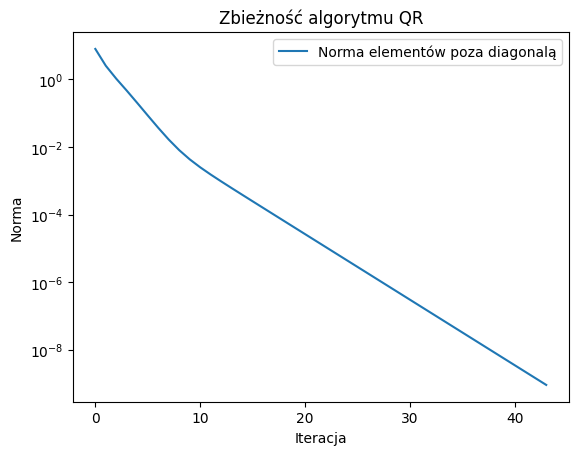

In [31]:
import matplotlib.pyplot as plt

def qr_convergence_plot(A, tol=1e-9, max_iter=1000):
    norms = []
    A = A.copy()

    for i in range(max_iter):
        Q, R = householder_qr_decomposition(A)
        A = R @ Q

        off_diag_norm = np.sqrt(np.sum(np.tril(A, k=-1)**2))
        norms.append(off_diag_norm)

        if off_diag_norm < tol:
            break

    plt.plot(norms, label="Norma elementów poza diagonalą")
    plt.yscale("log")
    plt.xlabel("Iteracja")
    plt.ylabel("Norma")
    plt.title("Zbieżność algorytmu QR")
    plt.legend()
    plt.show()

qr_convergence_plot(A)

####Automatyczne testy poprawności
Przetestowano dla macierzy **z dokładnie znanymi wartościami własnymi**.

In [36]:
def test_qr_algorithm():
    test_cases = [
        (np.array([[2, 1], [1, 2]], dtype=float), [3, 1]),  # Znane wartości własne: 3, 1
        (np.array([[4, -2, 1], [-2, 4, -2], [1, -2, 3]], dtype=float), [7.11902668,2.56837289,1.31260044])
    ]

    for i, (A, expected) in enumerate(test_cases):
        computed = np.sort(qr_algorithm_eigenvalues(A))
        expected = np.sort(expected)
        assert np.allclose(computed, expected, atol=1e-3), f"Błąd w teście {i+1}: {computed} ≠ {expected}"

    print("Wszystkie testy zaliczone!")

test_qr_algorithm()

Wszystkie testy zaliczone!


Wszystkie testy są zaliczone, co oznacza, że algorytm zaimplementowano poprawnie😊